In [4]:
import torch
import matplotlib.pyplot as plt
plt.style.use("dark_background")

DEVICE = "cpu"

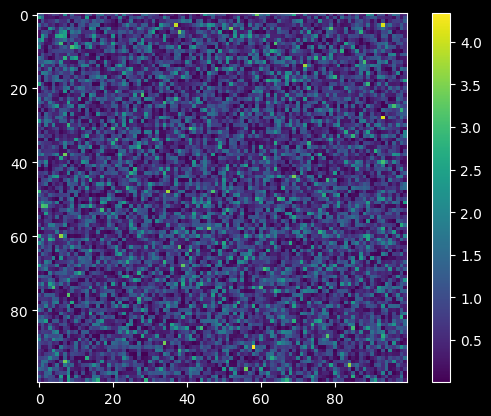

In [65]:
torch.manual_seed(0)
V = torch.randn(100, 100).abs().to(DEVICE)
plt.imshow(V)
plt.colorbar()

In [68]:
def nmf(V: torch.Tensor, k=10, max_iters=10_000, device="cpu"):
	assert len(V.shape) == 2, "Must be a matrix"
	assert torch.allclose(V, V.abs()), "Must be non-negative"
	assert k > 0 and int(k) == k, "k must be positive integer"

	m, n = V.shape
	W = torch.randn((m, k)).to(device).abs()
	H = torch.randn((k, n)).to(device).abs()

	for i in range(max_iters):
		H *= W.T.matmul(V) / W.T.matmul(W).matmul(H)
		W *= V.matmul(H.T) / W.matmul(H).matmul(H.T)
		print(i, torch.linalg.norm(V - W@H))
	
	return W, H

0 tensor(60.1707)
1 tensor(59.2568)
2 tensor(58.3493)
3 tensor(57.4187)
4 tensor(56.4752)
5 tensor(55.5424)
6 tensor(54.6490)
7 tensor(53.8237)
8 tensor(53.0863)
9 tensor(52.4412)
10 tensor(51.8810)
11 tensor(51.3945)
12 tensor(50.9711)
13 tensor(50.6004)
14 tensor(50.2727)
15 tensor(49.9799)
16 tensor(49.7157)
17 tensor(49.4756)
18 tensor(49.2562)
19 tensor(49.0547)
20 tensor(48.8689)
21 tensor(48.6967)
22 tensor(48.5367)
23 tensor(48.3875)
24 tensor(48.2481)
25 tensor(48.1176)
26 tensor(47.9951)
27 tensor(47.8800)
28 tensor(47.7716)
29 tensor(47.6694)
30 tensor(47.5728)
31 tensor(47.4814)
32 tensor(47.3946)
33 tensor(47.3121)
34 tensor(47.2336)
35 tensor(47.1587)
36 tensor(47.0870)
37 tensor(47.0185)
38 tensor(46.9527)
39 tensor(46.8896)
40 tensor(46.8289)
41 tensor(46.7704)
42 tensor(46.7141)
43 tensor(46.6597)
44 tensor(46.6072)
45 tensor(46.5564)
46 tensor(46.5073)
47 tensor(46.4598)
48 tensor(46.4138)
49 tensor(46.3691)
50 tensor(46.3259)
51 tensor(46.2839)
52 tensor(46.2431)
53 

Text(0.5, 1.0, 'Approximate A')

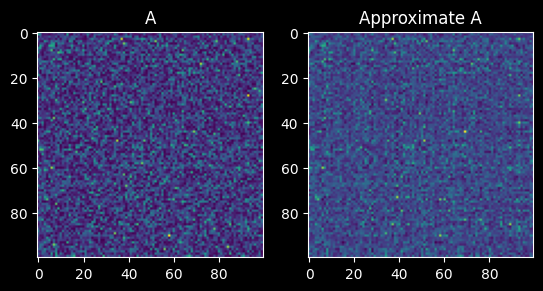

In [69]:
torch.manual_seed(0)
B, C = nmf(V, k=20)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(V)
axes[0].set_title("A")

axes[1].imshow(B@C)
axes[1].set_title("Approximate A")